In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_squared_log_error

from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv('train_cleaned.csv')
df.head()

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,13328,0
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,16621,0
2,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,right,Black,2,8467,0
3,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,left,White,0,3607,0
4,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,left,Silver,4,11726,0


In [3]:
df['logprice'] = np.log(df['price'])

In [4]:
df.shape

(19237, 19)

<AxesSubplot:>

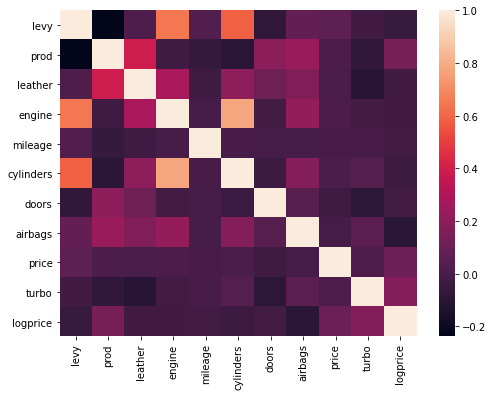

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

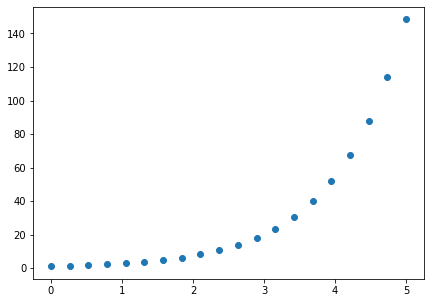

In [73]:
plt.figure(figsize=(7,5))
x = np.linspace(0,5,20)
fx = np.exp(x)
plt.scatter(x, fx)

C:\Users\Anshu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


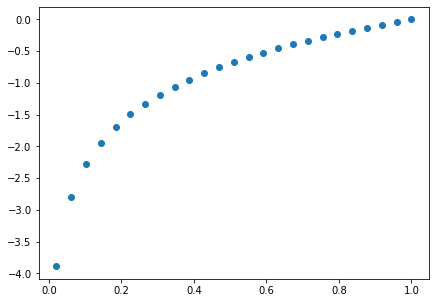

In [52]:
plt.figure(figsize=(7,5))
x = np.linspace(-1,1,50)
fx = np.log(x)
plt.scatter(x, fx)

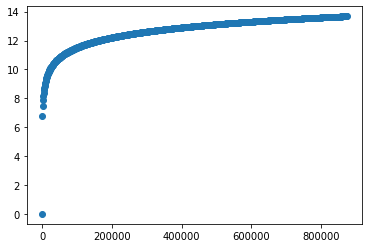

In [82]:
price = df['price'].drop(16983)
x = np.linspace(price.min(), price.max(), 1000)
fx = np.log(x)
plt.scatter(x, fx)

### understand the data

In [100]:
df['full_model'] = df[['manufacturer','model']].apply(lambda x: '_'.join([str(x['manufacturer']).replace(' ', '_'), 
                                                       str(x['model']).replace(' ','_')]), 
                                   axis=1)
df['full_model'].head()

0         LEXUS_RX_450
1    CHEVROLET_Equinox
2            HONDA_FIT
3          FORD_Escape
4            HONDA_FIT
Name: full_model, dtype: object

In [6]:
df.sort_values('price', ascending=False)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
16983,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,left,Blue,0,26307500,0,17.085365
8541,2068.0,LAMBORGHINI,Urus,2019,Universal,1,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,left,Black,0,872946,0,13.679629
1225,NaN,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,1,Petrol,6.3,0,8.0,Tiptronic,4x4,4,left,Black,12,627220,1,13.349053
5008,1694.0,PORSCHE,911,2016,Coupe,1,Petrol,4.0,8690,6.0,Automatic,Rear,2,left,Black,12,308906,0,12.640792
14839,NaN,LAND ROVER,Range Rover Vogue,2019,Jeep,1,Diesel,3.0,4500,8.0,Tiptronic,4x4,4,left,Black,12,297930,1,12.604614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636,NaN,MERCEDES-BENZ,C 220,1998,Sedan,0,Diesel,2.2,20600,4.0,Manual,Rear,4,left,Black,2,3,0,1.098612
221,NaN,HYUNDAI,Elantra,2011,Sedan,1,Petrol,1.8,80000,4.0,Tiptronic,Front,4,left,Grey,6,3,0,1.098612
4958,1502.0,VOLKSWAGEN,Jetta,2014,Sedan,1,Petrol,1.8,134400,4.0,Tiptronic,Front,4,right,Black,6,3,1,1.098612
16992,1202.0,CHEVROLET,Lacetti,2006,Hatchback,0,Petrol,1.6,200000,4.0,Manual,Front,4,left,Black,2,1,0,0.000000


In [ ]:
df.groupby(['full_model', 'prod'])['price'].mean().plot(kind='barh')
# takes too long

In [117]:
df.loc[df['manufacturer'] == 'OPEL']['model'].value_counts().sort_index()[16:20].index

Index(['Combo', 'Combo 1700', 'Combo 2001', 'Combo TDI'], dtype='object')

In [122]:
df.loc[(df['manufacturer'] == 'OPEL') &
       (df['model'].isin(['Combo', 'Combo 1700', 'Combo 2001', 'Combo TDI']))].sort_values('prod').head()

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice,full_model
8690,NaN,OPEL,Combo,1998,Goods wagon,0,Diesel,1.7,0,4.0,Manual,Front,2,left,White,1,5000,1,8.517193,OPEL_Combo
16983,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,left,Blue,0,26307500,0,17.085365,OPEL_Combo
17048,NaN,OPEL,Combo,2000,Goods wagon,0,Petrol,1.6,23000,4.0,Manual,Front,5,left,Red,2,6272,0,8.743851,OPEL_Combo
8111,1442.0,OPEL,Combo,2000,Goods wagon,1,Diesel,1.7,250000,4.0,Manual,Front,4,left,Black,2,6272,0,8.743851,OPEL_Combo
2139,NaN,OPEL,Combo 2001,2001,Goods wagon,0,Diesel,1.7,236424,4.0,Manual,Front,2,left,White,2,6500,0,8.779557,OPEL_Combo_2001


### Since there is absurd value in the price, which is a target column, we should drop it. Trying to impute it will add more randomness in data, will not help with modelling.

In [29]:
df = df.drop(16983)

In [30]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,13328,0,9.497622
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,16621,0,9.718422


#### manufacturer

<AxesSubplot:xlabel='price', ylabel='manufacturer'>

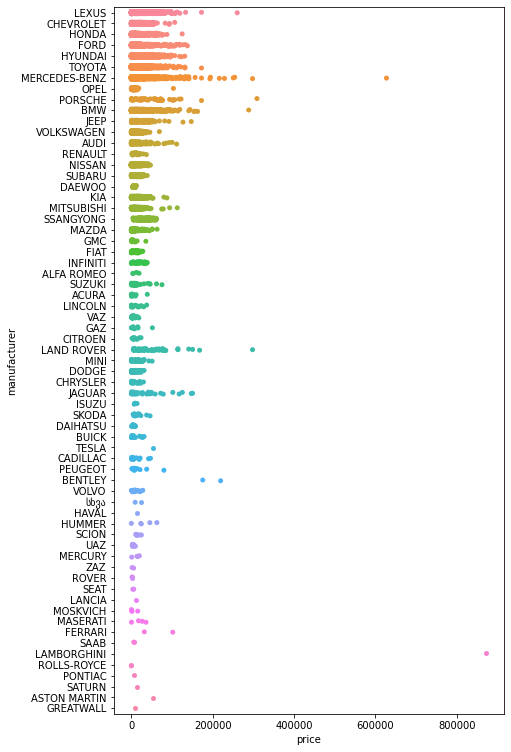

In [125]:
plt.figure(figsize=(7,13))
sns.stripplot(data=df, y='manufacturer', x='price')

#### make

<AxesSubplot:xlabel='logprice', ylabel='manufacturer'>

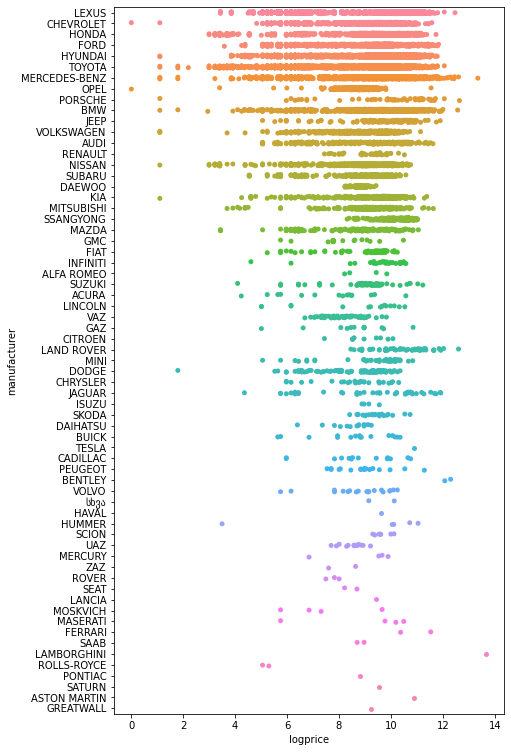

In [137]:
plt.figure(figsize=(7,13))
sns.stripplot(data=df, y='manufacturer', x='logprice')

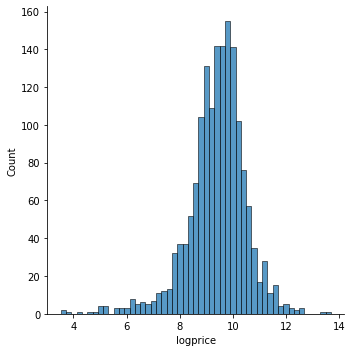

In [134]:
sns.displot(df.groupby(['full_model'])['logprice'].mean())

### prod

In [7]:
df['prod'].value_counts()[:10]

2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
2010    1483
2016    1476
2017     959
2008     737
2009     601
Name: prod, dtype: int64

<AxesSubplot:xlabel='prod', ylabel='price'>

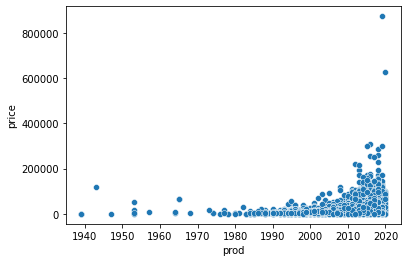

In [145]:
sns.scatterplot(data=df, x='prod', y='price')

<AxesSubplot:xlabel='prod', ylabel='logprice'>

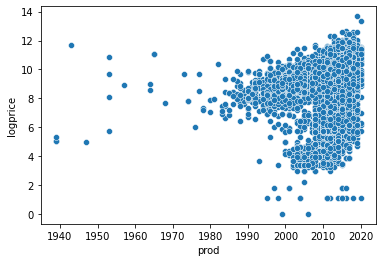

In [144]:
sns.scatterplot(data=df, x='prod', y='logprice')

In [147]:
df['age'] = 2021 - df['prod']

<AxesSubplot:xlabel='age', ylabel='price'>

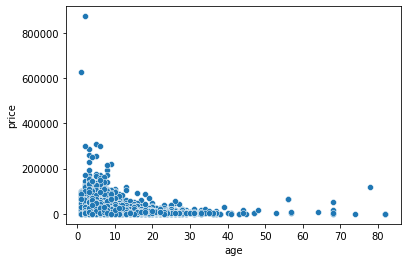

In [156]:
sns.scatterplot(data=df, x='age', y='price')

<AxesSubplot:xlabel='age', ylabel='logprice'>

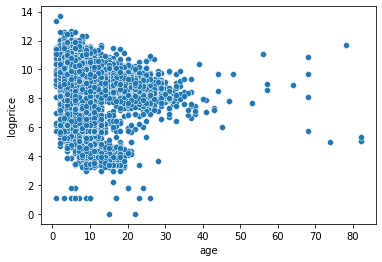

In [157]:
sns.scatterplot(data=df, x='age', y='logprice')

### category

<AxesSubplot:xlabel='logprice', ylabel='category'>

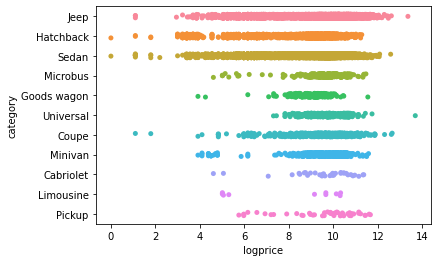

In [169]:
sns.stripplot(data=df, y='category', x='logprice')

In [170]:
# transforming to logprice seems to provide much uniformity in the data

In [164]:
13200000/70

188571.42857142858

In [8]:
df[df['category'] == 'Jeep'].loc[df['price']<1000].sort_values('price')

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
9730,900.0,KIA,Sportage,2015,Jeep,0,Petrol,2.4,50345,4.0,Tiptronic,4x4,4,left,Blue,12,3,0,1.098612
753,NaN,NISSAN,X-Terra,2004,Jeep,0,Petrol,3.3,323200,6.0,Automatic,4x4,4,left,Black,2,3,0,1.098612
7276,NaN,MERCEDES-BENZ,G 55 AMG,2020,Jeep,1,LPG,1.8,1212,12.0,Manual,4x4,5,left,Purple,0,3,1,1.098612
13076,NaN,BMW,X5,2005,Jeep,1,Diesel,3.0,330000,6.0,Tiptronic,4x4,4,left,Grey,12,19,1,2.944439
16446,NaN,TOYOTA,RAV 4,2012,Jeep,1,Diesel,2.2,120000,4.0,Manual,4x4,4,left,White,13,25,1,3.218876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17553,1104.0,BMW,X5,2015,Jeep,1,Diesel,3.0,196614,6.0,Automatic,4x4,4,left,Black,0,941,0,6.846943
8790,1055.0,LEXUS,RX 450,2013,Jeep,1,Hybrid,3.5,361603,6.0,Automatic,Front,4,left,Black,12,941,0,6.846943
17532,1493.0,HONDA,Pilot,2016,Jeep,1,Petrol,3.5,0,6.0,Automatic,4x4,4,left,Black,12,941,0,6.846943
17848,1058.0,LEXUS,RX 450,2012,Jeep,1,Hybrid,3.5,232357,6.0,Automatic,4x4,4,left,Black,12,941,0,6.846943


### less than 1000 prices seem to be absurd

### leather

In [179]:
df['leather'].value_counts()

1    13954
0     5282
Name: leather, dtype: int64

<AxesSubplot:xlabel='leather', ylabel='logprice'>

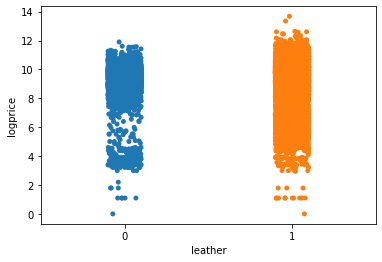

In [176]:
sns.stripplot(data=df, x='leather', y='logprice')

<AxesSubplot:xlabel='leather', ylabel='logprice'>

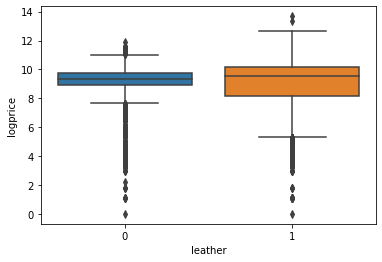

In [177]:
sns.boxplot(data=df, x='leather', y='logprice')

<AxesSubplot:xlabel='leather', ylabel='logprice'>

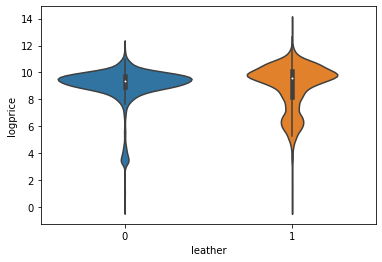

In [178]:
sns.violinplot(data=df, x='leather', y='logprice')

In [8]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,13328,0,9.497622
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,16621,0,9.718422


### FUEL

<AxesSubplot:xlabel='logprice', ylabel='fuel'>

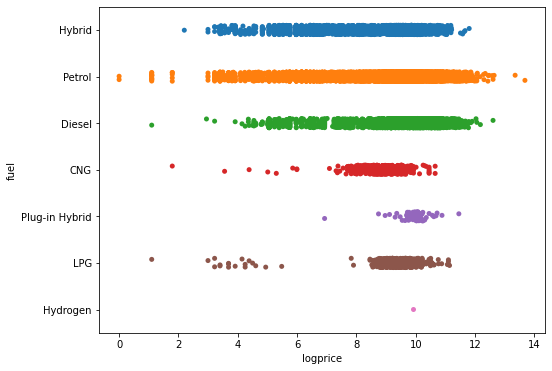

In [46]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df, y='fuel', x='logprice')

<AxesSubplot:xlabel='logprice', ylabel='fuel'>

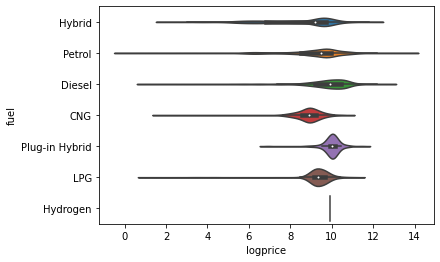

In [45]:
sns.violinplot(data=df, y='fuel', x='logprice')

In [48]:
df.loc[df['fuel'] == 'LPG'].sort_values('logprice')[:5]

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
7276,NaN,MERCEDES-BENZ,G 55 AMG,2020,Jeep,1,LPG,1.8,1212,12.0,Manual,4x4,5,left,Purple,0,3,1,1.098612
14389,NaN,TOYOTA,Prius,2008,Hatchback,1,LPG,1.5,111111,4.0,Automatic,Front,4,left,White,8,20,0,2.995732
10588,NaN,TOYOTA,Prius,2013,Hatchback,0,LPG,1.8,176000,4.0,Variator,Front,4,left,White,4,25,0,3.218876
6401,NaN,NISSAN,Tiida,2006,Hatchback,1,LPG,1.5,178000,5.0,Automatic,Front,4,right,Green,7,25,0,3.218876
1818,NaN,TOYOTA,Prius,2007,Hatchback,0,LPG,1.5,198000,4.0,Tiptronic,Front,4,left,White,4,30,0,3.401197


In [56]:
# any trend in G 55 AMGs ?
df.loc[df['model'] == 'G 55 AMG']

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
2941,NaN,MERCEDES-BENZ,G 55 AMG,2003,Jeep,1,Petrol,5.5,137500,8.0,Automatic,4x4,4,left,Silver,8,87811,1,11.382942
4994,NaN,MERCEDES-BENZ,G 55 AMG,1996,Jeep,1,Petrol,5.5,180000,8.0,Automatic,4x4,2,left,Black,8,40769,0,10.615677
7276,NaN,MERCEDES-BENZ,G 55 AMG,2020,Jeep,1,LPG,1.8,1212,12.0,Manual,4x4,5,left,Purple,0,3,1,1.098612
10271,NaN,MERCEDES-BENZ,G 55 AMG,2005,Jeep,1,Petrol,5.5,111111,8.0,Tiptronic,4x4,4,left,Silver,8,399,0,5.988961


### if we try to impute only based on G 55 AMG features, we will have to take the mean of only the two valid looking observations.

### will try to find similar jeeps to the ones having absurdly low price above

In [93]:

df.loc[(df['manufacturer'] == 'MERCEDES-BENZ')
#       & (df['model'] == 'G 55 AMG')
#       & (df['prod'] == 2020)
      & (df['category'] == 'Jeep')
#       & (df['leather'] == 1)
#       & (df['cylinders'] == 12)
#       & (df['turbo'] == 1)
#       & (df['drive'] == '4X4')
#       & (df['gear'] == 'Manual')
#       & (df['fuel'] == 'LPG')
#        & (df['engine'] == 1.8)
       & (df['model'].str.find('G ')>=0)
#        & (df['model'].str.find(' ')>=0)
      ].sort_values('engine', ascending=False).sort_values('price'
                                                          )

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
7276,NaN,MERCEDES-BENZ,G 55 AMG,2020,Jeep,1,LPG,1.8,1212,12.0,Manual,4x4,5,left,Purple,0,3,1,1.098612
10271,NaN,MERCEDES-BENZ,G 55 AMG,2005,Jeep,1,Petrol,5.5,111111,8.0,Tiptronic,4x4,4,left,Silver,8,399,0,5.988961
17990,1694.0,MERCEDES-BENZ,G 550,2016,Jeep,1,Petrol,4.0,34960,8.0,Automatic,4x4,4,left,Black,12,549,0,6.308098
6884,1694.0,MERCEDES-BENZ,G 550,2016,Jeep,1,Petrol,4.0,74990,8.0,Automatic,4x4,4,left,White,12,1882,0,7.540090
3317,NaN,MERCEDES-BENZ,G 300,1988,Jeep,0,Diesel,2.9,138000,4.0,Manual,4x4,2,left,Black,2,15681,1,9.660205
14175,NaN,MERCEDES-BENZ,G 230 2.2cdi,1987,Jeep,0,Diesel,2.2,243567,4.0,Manual,4x4,4,left,Black,0,20385,0,9.922555
10721,2296.0,MERCEDES-BENZ,G 63 AMG,2016,Jeep,1,Petrol,5.5,39325,8.0,Automatic,4x4,4,left,Black,12,31675,0,10.363283
4994,NaN,MERCEDES-BENZ,G 55 AMG,1996,Jeep,1,Petrol,5.5,180000,8.0,Automatic,4x4,2,left,Black,8,40769,0,10.615677
12538,1946.0,MERCEDES-BENZ,G 550,2017,Jeep,1,Petrol,4.0,54730,8.0,Automatic,4x4,4,left,White,12,42965,0,10.668141
4621,NaN,MERCEDES-BENZ,G 320,1994,Jeep,1,Petrol,3.2,200000,6.0,Automatic,4x4,4,left,Black,0,43905,0,10.689783


Object `substr` not found.


### something looks  here, how can a mercedes benj Jeep of 2020 of  1.8L enginewith 12 cylinders cost 3 dollars?

<AxesSubplot:xlabel='engine', ylabel='cylinders'>

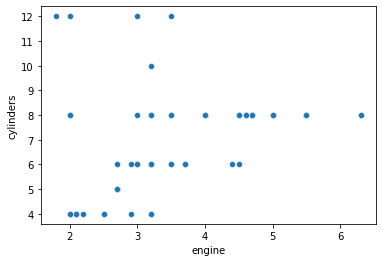

In [74]:
sns.scatterplot(data=df.loc[(df['manufacturer'] == 'MERCEDES-BENZ')
      & (df['category'] == 'Jeep')][['engine','cylinders']], x='engine', y='cylinders')

### May need to do KNN Imputation or KNN classifier prediction or clustering.

### Engine

<AxesSubplot:xlabel='engine', ylabel='price'>

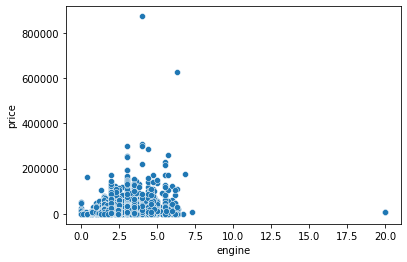

In [11]:
sns.scatterplot(data=df, x='engine', y='price')

<AxesSubplot:xlabel='engine', ylabel='logprice'>

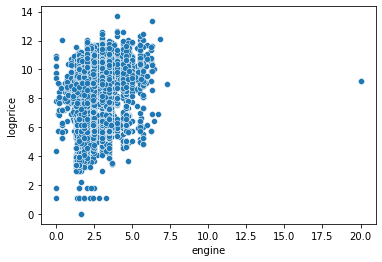

In [12]:
sns.scatterplot(data=df, x='engine', y='logprice')

In [15]:
df.sort_values('engine', ascending=False)[:3]

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
17777,5604.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,20.0,333686,4.0,Automatic,Front,4,left,Silver,4,10036,0,9.213934
2357,5604.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,20.0,333686,4.0,Automatic,Front,4,left,Silver,4,10036,0,9.213934
5367,5876.0,MERCEDES-BENZ,CLK 430,2005,Cabriolet,0,Petrol,7.3,156470,12.0,Automatic,Rear,4,left,Black,12,7840,0,8.966994


In [9]:
df.loc[(df['manufacturer'] == 'HYUNDAI')
      & (df['model'] == 'Sonata')
      & (df['prod'] == 2014)
      & (df['leather'] == 1)
      & (df['cylinders'] == 4)
      & (df['turbo'] == 0)
      & (df['gear'] == 'Automatic')
      & (df['fuel'] == 'LPG')
      & (df['color'] == 'Silver')].sort_values('engine', ascending=False)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
17777,5604.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,20.0,333686,4.0,Automatic,Front,4,left,Silver,4,10036,0,9.213934
2357,5604.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,20.0,333686,4.0,Automatic,Front,4,left,Silver,4,10036,0,9.213934
12207,639.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,2.0,336971,4.0,Automatic,Front,4,left,Silver,4,11604,0,9.359105
13732,639.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,2.0,335782,4.0,Automatic,Front,4,left,Silver,4,10036,0,9.213934
13396,639.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,2.0,386544,4.0,Automatic,Front,4,left,Silver,4,11604,0,9.359105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,639.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,2.0,392894,4.0,Automatic,Front,4,left,Silver,4,12858,0,9.461721
4907,639.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,2.0,477316,4.0,Automatic,Front,4,left,Silver,4,11604,0,9.359105
4623,639.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,2.0,255784,4.0,Automatic,Front,4,left,Silver,4,10036,0,9.213934
4340,639.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,2.0,268046,4.0,Automatic,Front,4,left,Silver,4,10036,0,9.213934


### As we look at all Hyundai Sonata cars of 2014, with the same specs (cylinders, engine, leather, etc.) as our outlier, we see that most of them have engine capacity 2.0 L. It seems that it is incorrectly mentioned as 20.0 L. Let us confirm below.

In [10]:
df.loc[(df['manufacturer'] == 'HYUNDAI')
      & (df['model'] == 'Sonata')
      & (df['prod'] == 2014)
      & (df['leather'] == 1)
      & (df['cylinders'] == 4)
      & (df['turbo'] == 0)
      & (df['gear'] == 'Automatic')
      & (df['fuel'] == 'LPG')
      & (df['color'] == 'Silver')].sort_values('engine', ascending=False)['engine'].value_counts()

2.0     78
20.0     2
Name: engine, dtype: int64

### As we can see, its actually 2.0 L. Let us fill in the correct value.

In [11]:
df.loc[[17777,2357], 'engine'] = 2.0
df.loc[[17777,2357], 'engine']

17777    2.0
2357     2.0
Name: engine, dtype: float64

### mileage

In [97]:
logmileage = np.log(df['mileage'])
# sns.displot(data=df, x='mileage')

C:\Users\Anshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='mileage', ylabel='logprice'>

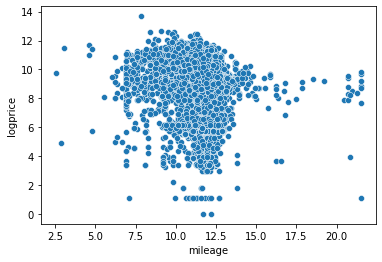

In [98]:
sns.scatterplot(x=logmileage, y=df['logprice'])

### No clear relation is visible.

In [100]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,13328,0,9.497622
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,16621,0,9.718422


### cylinders

<AxesSubplot:xlabel='cylinders', ylabel='logprice'>

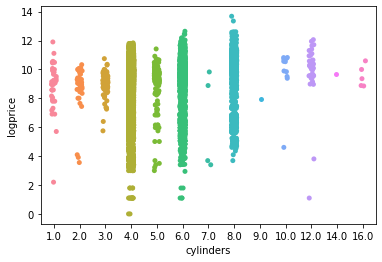

In [114]:
sns.stripplot(data=df, x='cylinders', y='logprice')

<AxesSubplot:xlabel='cylinders', ylabel='logprice'>

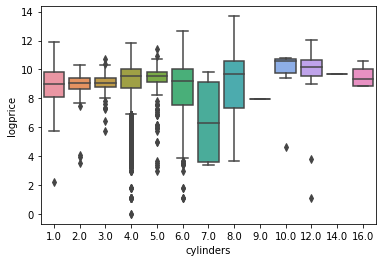

In [115]:
sns.boxplot(data=df, x='cylinders', y='logprice')

### clear trend seems to be visible. Middle values are higher, lower prices in extreme values of cylinders. Some outliers in 8 cylinders...

In [107]:
df.loc[
#     (df['manufacturer'] == 'HYUNDAI')
#       & (df['model'] == 'Sonata')
#       & (df['prod'] == 2014)
#       & (df['leather'] == 1)
      (df['cylinders'] == 8)
#       & (df['turbo'] == 0)
#       & (df['gear'] == 'Automatic')
#       & (df['fuel'] == 'LPG')
#       & (df['color'] == 'Silver')
].sort_values('price', ascending=False)[:15]

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
8541,2068.0,LAMBORGHINI,Urus,2019,Universal,1,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,left,Black,0,872946,0,13.679629
1225,NaN,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,1,Petrol,6.3,0,8.0,Tiptronic,4x4,4,left,Black,12,627220,1,13.349053
9367,NaN,MERCEDES-BENZ,AMG GT S,2015,Coupe,1,Petrol,4.0,20000,8.0,Tiptronic,Rear,2,left,White,16,297930,1,12.604614
14839,NaN,LAND ROVER,Range Rover Vogue,2019,Jeep,1,Diesel,3.0,4500,8.0,Tiptronic,4x4,4,left,Black,12,297930,1,12.604614
7749,2268.0,BMW,M5 Машина в максимально,2018,Sedan,1,Petrol,4.4,13500,8.0,Tiptronic,4x4,4,left,Black,0,288521,0,12.572523
10759,NaN,LEXUS,LX 570,2018,Jeep,1,Petrol,5.7,17700,8.0,Tiptronic,4x4,4,left,Black,10,260296,1,12.469575
7283,NaN,MERCEDES-BENZ,GLE 63 AMG,2018,Jeep,1,Petrol,5.5,23000,8.0,Tiptronic,4x4,4,left,Black,16,228935,1,12.341193
2283,NaN,BENTLEY,Continental GT,2012,Coupe,1,Petrol,4.0,55500,8.0,Tiptronic,4x4,2,left,Black,0,219527,1,12.299231
7353,NaN,MERCEDES-BENZ,G 65 AMG G63 AMG,2013,Jeep,1,Petrol,5.5,54000,8.0,Tiptronic,4x4,4,left,Black,12,216391,1,12.284842
4722,2820.0,BENTLEY,Mulsanne,2016,Sedan,1,Petrol,6.8,6189,8.0,Automatic,Rear,4,left,Black,12,175622,0,12.076089


In [111]:
df.loc[
    df['manufacturer'] == 'LAMBORGHINI'
]

# only one lambo in the dataset, not an outlier.

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
8541,2068.0,LAMBORGHINI,Urus,2019,Universal,1,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,left,Black,0,872946,0,13.679629


### GEAR

<AxesSubplot:xlabel='gear', ylabel='logprice'>

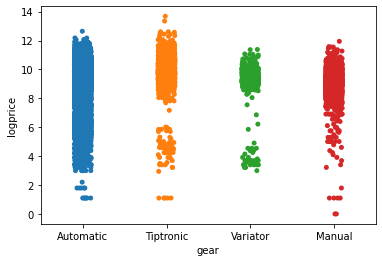

In [122]:
sns.stripplot(data=df, x='gear', y='logprice')

<AxesSubplot:xlabel='gear', ylabel='logprice'>

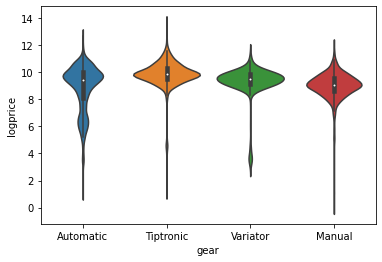

In [123]:
sns.violinplot(data=df, x='gear', y='logprice')

### no clear trend. Tiptronic and variator prices are dense near the extreme ranges, sparse in the middle.

### drive

<AxesSubplot:xlabel='drive', ylabel='logprice'>

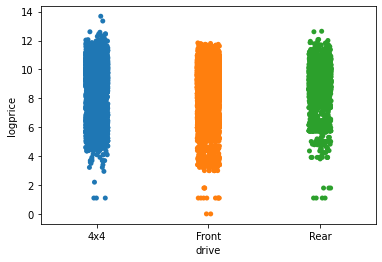

In [124]:
sns.stripplot(data=df, x='drive', y='logprice')

<AxesSubplot:xlabel='drive', ylabel='logprice'>

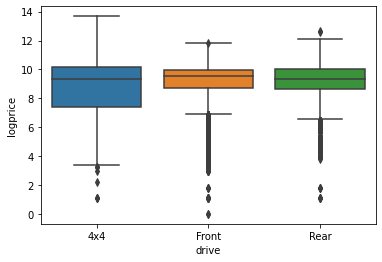

In [125]:
sns.boxplot(data=df, x='drive', y='logprice')

### again no trend

<AxesSubplot:xlabel='doors', ylabel='logprice'>

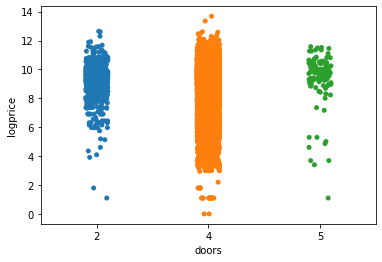

In [128]:
sns.stripplot(data=df, x='doors', y='logprice')

### wheel

<AxesSubplot:xlabel='wheel', ylabel='price'>

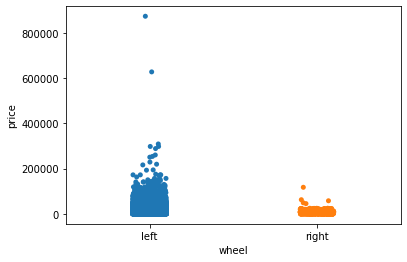

In [130]:
sns.stripplot(data=df, x='wheel', y='price')

### left wheel cars seem to be cheap

### color

<AxesSubplot:xlabel='logprice', ylabel='color'>

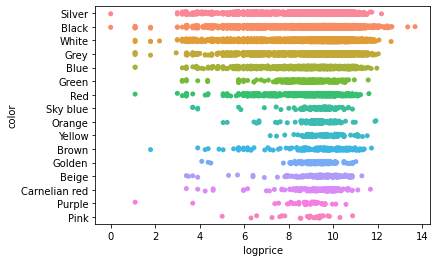

In [134]:
sns.stripplot(data=df, y='color', x='logprice')

### airbags

<AxesSubplot:xlabel='airbags', ylabel='logprice'>

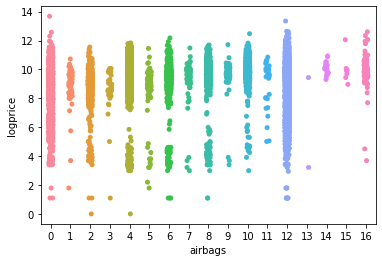

In [137]:
sns.stripplot(data=df, x='airbags', y='logprice')

In [13]:
df.sort_values('price', ascending=False).head()

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
16983,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,left,Blue,0,26307500,0,17.085365
8541,2068.0,LAMBORGHINI,Urus,2019,Universal,1,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,left,Black,0,872946,0,13.679629
1225,NaN,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,1,Petrol,6.3,0,8.0,Tiptronic,4x4,4,left,Black,12,627220,1,13.349053
5008,1694.0,PORSCHE,911,2016,Coupe,1,Petrol,4.0,8690,6.0,Automatic,Rear,2,left,Black,12,308906,0,12.640792
14839,NaN,LAND ROVER,Range Rover Vogue,2019,Jeep,1,Diesel,3.0,4500,8.0,Tiptronic,4x4,4,left,Black,12,297930,1,12.604614


In [15]:
df.select_dtypes('object').head(2)

,manufacturer,model,category,fuel,gear,drive,wheel,color
0,LEXUS,RX 450,Jeep,Hybrid,Automatic,4x4,left,Silver
1,CHEVROLET,Equinox,Jeep,Petrol,Tiptronic,4x4,left,Black


In [17]:
df.select_dtypes(include=np.number).head(2)

,levy,prod,leather,engine,mileage,cylinders,doors,airbags,price,turbo,logprice
0,1399.0,2010,1,3.5,186005,6.0,4,12,13328,0,9.497622
1,1018.0,2011,0,3.0,192000,6.0,4,8,16621,0,9.718422


### till now we have not dropped any columns, of imputed any NaN values. We have just made some format changes and made the data into correct dtypes.

### is the model column varying enough that we can drop manufacturer ?

In [22]:
df.groupby('model')['manufacturer'].nunique().sort_values(ascending=False)[:5]

model
200        3
Cougar     2
300        2
Patriot    2
416        2
Name: manufacturer, dtype: int64

### Some model names have appeared in multiple columns. So we cannot drop model feature.

In [220]:
df.shape

(19236, 19)

In [31]:
df.to_csv('train_cleaned.csv')

### Let us try with just imputation and basic modelling

### Splitting train and test

In [1]:
df = pd.read_csv('train_cleaned.csv')

NameError: name 'pd' is not defined

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
input_cols = df.drop(['price','logprice'], axis=1).columns
price = df['price']
logprice = df['logprice']

In [174]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(df[input_cols],
                                                                       df['price'],
                                                                       test_size=0.3)

In [175]:
train_inputs.shape, val_inputs.shape, train_targets.shape, val_targets.shape

((13465, 17), (5771, 17), (13465,), (5771,))

### Imputing numeric cols with mean

In [176]:
numeric_cols = list(train_inputs.select_dtypes(include = np.number).columns)
categorical_cols = list(train_inputs.select_dtypes('object').columns)

In [177]:
numeric_cols

['levy',
 'prod',
 'leather',
 'engine',
 'mileage',
 'cylinders',
 'doors',
 'airbags',
 'turbo']

In [178]:
categorical_cols

['manufacturer',
 'model',
 'category',
 'fuel',
 'gear',
 'drive',
 'wheel',
 'color']

In [179]:
df[categorical_cols].isna().sum().sum()

0

In [180]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean')

In [181]:
num_imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [182]:
train_inputs[numeric_cols] = num_imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = num_imputer.transform(val_inputs[numeric_cols])

In [184]:
train_inputs[numeric_cols].isna().sum().sum(), val_inputs[numeric_cols].isna().sum().sum()

(0, 0)

### There are no null values in categorical columns.

In [213]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')

In [214]:
train_inputs[categorical_cols].isna().sum().sum()

0

### One-hot encoding categorical columns. For this we, will use the complete dataset, and not just the train data, to get all available categories to us.

In [186]:
df[categorical_cols].head(2)

,manufacturer,model,category,fuel,gear,drive,wheel,color
0,LEXUS,RX 450,Jeep,Hybrid,Automatic,4x4,left,Silver
1,CHEVROLET,Equinox,Jeep,Petrol,Tiptronic,4x4,left,Black


In [187]:
from sklearn.preprocessing import OneHotEncoder

In [189]:
# OPTIONAL
# print([round(len(df)/5)* i for i in range(1,6)])
# # manually deciding the train, val, test index

# shuffled_index = np.random.randint(0, len(df), len(df))
# train_df = df.loc[shuffled_index[:11541]]
# val_df = df.loc[shuffled_index[11541:15388]]
# test_df = df.loc[shuffled_index[15388:]]
# train_df.shape, val_df.shape, test_df.shape

In [190]:
one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [192]:
one_hot.fit(df[categorical_cols])
encoded_cols = list(one_hot.get_feature_names(categorical_cols))
encoded_cols[:5]

['manufacturer_ACURA',
 'manufacturer_ALFA ROMEO',
 'manufacturer_ASTON MARTIN',
 'manufacturer_AUDI',
 'manufacturer_BENTLEY']

In [193]:
train_inputs[categorical_cols][:2]

,manufacturer,model,category,fuel,gear,drive,wheel,color
10853,SSANGYONG,Korando,Jeep,Diesel,Automatic,Front,left,Black
2813,CHEVROLET,Cruze LT,Sedan,Petrol,Tiptronic,Front,left,White


In [194]:
train_inputs[encoded_cols] = one_hot.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = one_hot.transform(val_inputs[categorical_cols])

In [200]:
len(numeric_cols), len(encoded_cols)

(9, 1698)

In [201]:
train_inputs[numeric_cols+encoded_cols].head(2)

,levy,prod,leather,engine,mileage,cylinders,doors,airbags,turbo,manufacturer_ACURA,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
10853,642.0,2012.0,1.0,2.0,86651.0,4.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2813,650.0,2016.0,0.0,1.4,77000.0,4.0,4.0,12.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [202]:
x_train = train_inputs[numeric_cols+encoded_cols]
x_val = val_inputs[numeric_cols+encoded_cols]

In [204]:
x_train.shape, x_val.shape, train_targets.shape, val_targets.shape

((13465, 1707), (5771, 1707), (13465,), (5771,))

### fitting with simple decisiontree

In [205]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=21)

In [206]:
dt.fit(x_train, train_targets)

DecisionTreeRegressor(random_state=21)

In [222]:
dt.get_depth()

62

In [207]:
train_preds = dt.predict(x_train)
(train_targets - train_preds).sum()

2.9103830456733704e-11

In [208]:
val_preds = dt.predict(x_val)
val_preds

array([ 6586.,  6429., 30326., ..., 42337., 12231.,   392.])

In [211]:
from sklearn.metrics import mean_squared_log_error

In [215]:
np.sqrt(mean_squared_log_error(val_targets, val_preds))

1.2683198022916276

In [224]:
def fit_predict(estimator, x_train=x_train, train_targets=train_targets, x_val=x_val, 
                val_targets=val_targets):
    estimator.fit(x_train, train_targets)
    
    train_preds = estimator.predict(x_train)
    val_preds = estimator.predict(x_val)

    from sklearn.metrics import mean_squared_log_error
    
    train_error = np.sqrt(mean_squared_log_error(train_targets, train_preds))
    val_error = np.sqrt(mean_squared_log_error(val_targets, val_preds))
    
    
    print('Train RMSLE:', train_error)
    print('Val RMSLE:', val_error)

In [226]:
model = DecisionTreeRegressor(random_state=21)
fit_predict(estimator=model)

Train RMSLE: 0.19974690381250637
Val RMSLE: 1.2683198022916276


In [221]:
dt.get_depth()

62

### regularised decision tree

In [227]:
model = DecisionTreeRegressor(random_state=21, max_depth=25)

fit_predict(estimator=model)

Train RMSLE: 0.5692979161543534
Val RMSLE: 1.2565097995513967


In [228]:
model = DecisionTreeRegressor(random_state=21, max_depth=35, min_samples_leaf=5)

fit_predict(estimator=model)

Train RMSLE: 0.8975075314719954
Val RMSLE: 1.1001981940488208


In [230]:
model = DecisionTreeRegressor(random_state=21, max_depth=30, min_samples_leaf=5)

fit_predict(estimator=model)

Train RMSLE: 0.8976098910531081
Val RMSLE: 1.0955000081814068
